In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt

In [3]:
import os
%cd drive/My\ Drive
!ls

/content/drive/My Drive
'Colab Notebooks'
'Getting started.pdf'
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 glove.6B.zip
 input_data.xlsx
 Mahima-07-05-2020.wav
'Mahima Sehgal Automation Deliverable - QA Test Writing.gsheet'
 Sarcasm_Headlines_Dataset.json
 testrail-import-trial_proj-2020-05-22.cfg


In [88]:
import pandas as pd
df = pd.read_excel (r'input_data.xlsx')
print (df)

                                      Short description  ... Assignment group
0                                           login issue  ...            GRP_0
1                                               outlook  ...            GRP_0
2                                    cant log in to vpn  ...            GRP_0
3                         unable to access hr_tool page  ...            GRP_0
4                                          skype error   ...            GRP_0
...                                                 ...  ...              ...
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[8500 rows x 4 columns]


In [89]:
df.shape

(8500, 4)

In [90]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [91]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_70       1
GRP_64       1
GRP_73       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**PRE-PROCESSING STEPS**
- Replacing Nan Values with Blank text string
- Grouping The Groups with less than 20 Tickets to seperate group
- Removing Duplicate Rows
- Group Description, Short Description and Caller to one group
- Text pre-processing on new text field

In [93]:
#Before Removing Nan
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [94]:
df[df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [95]:
import numpy as np
# Replace all Nan entries with empty string
df = df.replace(np.nan, '', regex=True)

In [96]:
#After Removing Nan
df.describe().transpose()

,count,unique,top,freq
Short description,8500,7482,password reset,38
Description,8500,7818,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


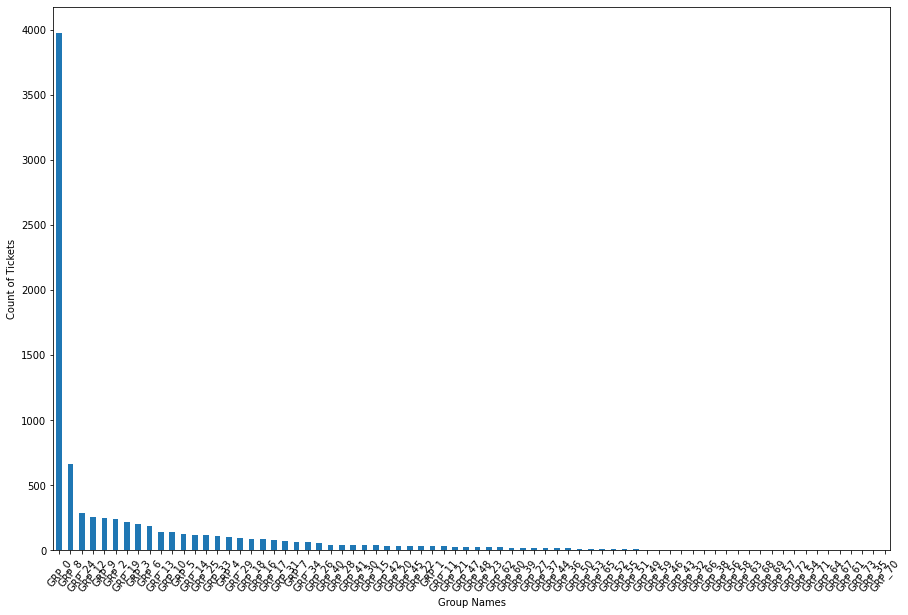

In [97]:
# Groupby by Group ID
group_df = df.groupby("Assignment group")

plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

In [98]:
#Combining Groups with less tickets
small_df = df[df.groupby('Assignment group')['Assignment group'].transform('size') < 50]
small_df.describe()


,Short description,Description,Caller,Assignment group
count,764,764,764,764
unique,746,755,471,50
top,msd crm,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_40
freq,4,3,33,45


In [99]:
df = df[df.groupby('Assignment group')['Assignment group'].transform('size') > 50]

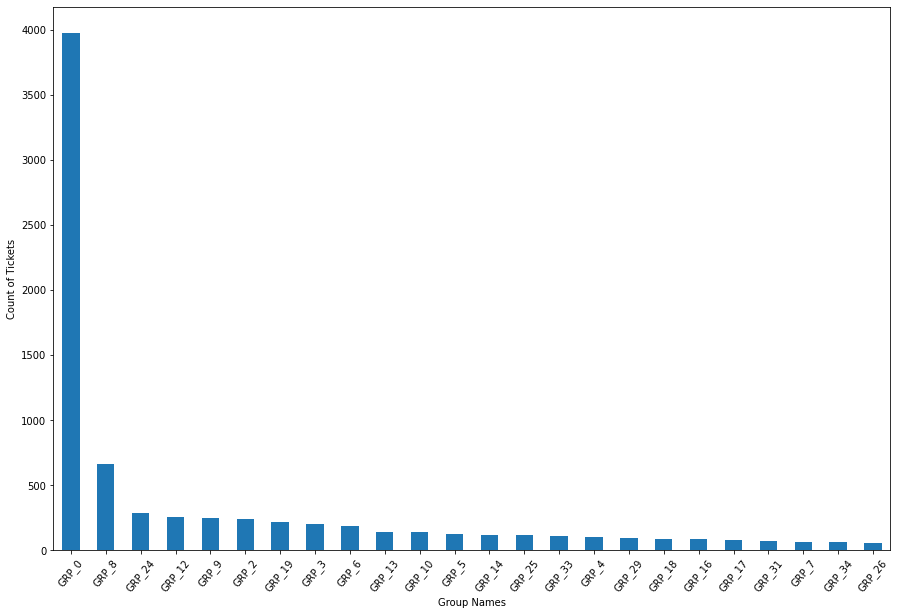

In [100]:
# Groupby by Group ID
group_df = df.groupby("Assignment group")
plt.figure(figsize=(15,10))
group_df.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Group Names")
plt.ylabel("Count of Tickets")
plt.show()

In [101]:
#Remove Duplicate Rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF.head()
df.drop_duplicates(keep=False,inplace=True)

In [102]:
df.describe()

,Short description,Description,Caller,Assignment group
count,7606,7606,7606,7606
unique,6731,7038,2785,24
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,34,744,3908


In [103]:
df.iloc[3]

Short description    unable to access hr_tool page
Description          unable to access hr_tool page
Caller                           xbkucsvz gcpydteq
Assignment group                             GRP_0
Name: 3, dtype: object

In [104]:
#Remove Short Description When Short Description == Description to remove redundant data for analysis
df.loc[df['Description'] == df['Short description'], 'Short description'] = ''

In [105]:
df.iloc[3]

Short description                                 
Description          unable to access hr_tool page
Caller                           xbkucsvz gcpydteq
Assignment group                             GRP_0
Name: 3, dtype: object

In [106]:
#Combine Text Fields
df['Final Description'] = df['Short description'].str.cat(df['Description'],sep=" ")
df['Final Description'] = df['Final Description'].str.cat(df['Caller'],sep=" ")

In [107]:
df['Final Description'].head()

0    login issue -verified user details.(employee# ...
1    outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2    cant log in to vpn \r\n\r\nreceived from: eylq...
3      unable to access hr_tool page xbkucsvz gcpydteq
4                       skype error  owlgqjme qhcozdfx
Name: Final Description, dtype: object

There are 1913499 words in the combination of all review.


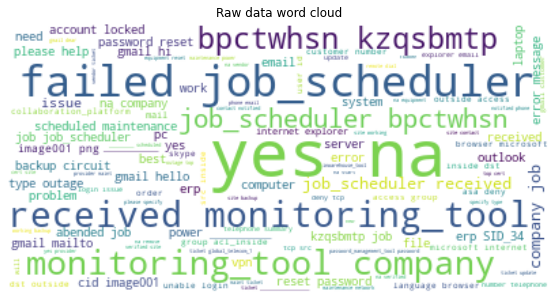

In [108]:
#Showcase Word Cloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator


text = " ".join(review for review in df['Final Description'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,5])
plt.title("Raw data word cloud")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [109]:
## Decontract the words
import re
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text



In [110]:
df['Final Description'] = df['Final Description'].apply(lambda x: decontract(x))
df.head()

,Short description,Description,Caller,Assignment group,Final Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn \r\n\r\nreceived from: e...
3,,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page xbkucsvz gcpydteq
4,,skype error,owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx


In [111]:
# Data Normalization
import re
def  clean_text(df, text_field, new_text_field_name):
    #convert to lower case
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    #remove single letters
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\b[a-zA-Z]\b", "", elem))  
    return df

In [112]:
df_clean = clean_text(df, 'Final Description', 'Description Clean')
df_clean


,Short description,Description,Caller,Assignment group,Final Description,Description Clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,outlook received from hmjdrvpb komuaywn ...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,can not log in to vpn \r\n\r\nreceived from: e...,can not log in to vpn received from eylqg...
3,,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq
4,,skype error,owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx
...,...,...,...,...,...,...
8493,"erp fi - ob09, two accounts to be added","i am sorry, i have another two accounts that n...",ipwjorsc uboapexr,GRP_10,"erp fi - ob09, two accounts to be added i am ...",erp fi ob two accounts to be added am sor...
8494,,tablet needs reimaged due to multiple issues w...,cpmaidhj elbaqmtp,GRP_3,tablet needs reimaged due to multiple issues ...,tablet needs reimaged due to multiple issues ...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail \r\n\r\nrece...,emails not coming in from zz mail received...
8496,,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue rbozivdq gmlhrtvp,telephony software issue rbozivdq gmlhrtvp


In [113]:
df_clean = df_clean.drop(['Short description', 'Description','Caller','Final Description'], axis=1)
df_clean.head()

,Assignment group,Description Clean
0,GRP_0,login issue verified user details employee ...
1,GRP_0,outlook received from hmjdrvpb komuaywn ...
2,GRP_0,can not log in to vpn received from eylqg...
3,GRP_0,unable to access hr tool page xbkucsvz gcpydteq
4,GRP_0,skype error owlgqjme qhcozdfx


There are 1765816 words in the combination of all review.


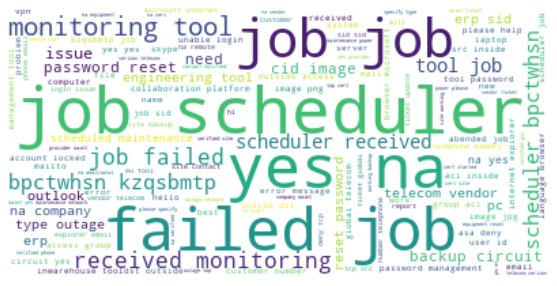

In [114]:
#Showcase Word Cloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator


text = " ".join(review for review in df_clean['Description Clean'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
# Data Cleaning -- Removing Stop words
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
newStopWords = ["na","sid","cid","null","hi","png","eu","hello"]
stop.extend(newStopWords)

df_clean['Description Clean'] = df_clean['Description Clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Assignment group,Description Clean
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...
3,GRP_0,unable access hr tool page xbkucsvz gcpydteq
4,GRP_0,skype error owlgqjme qhcozdfx


There are 1264195 words in the combination of all review.


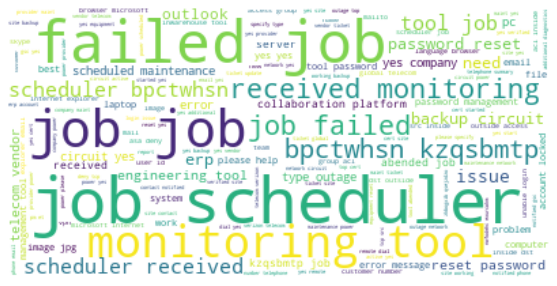

In [116]:
text = " ".join(review for review in df_clean['Description Clean'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [117]:
# Getting Word Tokens
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df_clean['Description Clean Tokens'] = df_clean['Description Clean'].apply(lambda x: word_tokenize(x))
df_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Assignment group,Description Clean,Description Clean Tokens
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ..."
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...,"[outlook, received, hmjdrvpb, komuaywn, com, t..."
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...,"[log, vpn, received, eylqgodm, ybqkwiam, com, ..."
3,GRP_0,unable access hr tool page xbkucsvz gcpydteq,"[unable, access, hr, tool, page, xbkucsvz, gcp..."
4,GRP_0,skype error owlgqjme qhcozdfx,"[skype, error, owlgqjme, qhcozdfx]"


In [118]:
#Stemming Fine word stems 
from nltk.stem import PorterStemmer
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
df_clean['Description Stem'] = df_clean['Description Clean Tokens'].apply(lambda x: word_stemmer(x))


In [35]:
#Lemmatization Find word Lemmas
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df_clean['Description lemma'] = df_clean['Description Stem'].apply(lambda x: word_lemmatizer(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [36]:
#POS Tagging
def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text
nltk.download('averaged_perceptron_tagger')
df_clean['Description POS'] = df_clean['Description Clean Tokens'].apply(lambda x: word_pos_tagger(x))
df_clean.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Assignment group,Description Clean,Description Clean Tokens,Description Stem,Description lemma,Description POS
0,GRP_0,login issue verified user details employee man...,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m...","[login, issu, verifi, user, detail, employe, m...","[(login, JJ), (issue, NN), (verified, VBD), (u..."
1,GRP_0,outlook received hmjdrvpb komuaywn com team me...,"[outlook, received, hmjdrvpb, komuaywn, com, t...","[outlook, receiv, hmjdrvpb, komuaywn, com, tea...","[outlook, receiv, hmjdrvpb, komuaywn, com, tea...","[(outlook, NN), (received, VBD), (hmjdrvpb, JJ..."
2,GRP_0,log vpn received eylqgodm ybqkwiam com cannot ...,"[log, vpn, received, eylqgodm, ybqkwiam, com, ...","[log, vpn, receiv, eylqgodm, ybqkwiam, com, ca...","[log, vpn, receiv, eylqgodm, ybqkwiam, com, ca...","[(log, NN), (vpn, NN), (received, VBD), (eylqg..."
3,GRP_0,unable access hr tool page xbkucsvz gcpydteq,"[unable, access, hr, tool, page, xbkucsvz, gcp...","[unabl, access, hr, tool, page, xbkucsvz, gcpy...","[unabl, access, hr, tool, page, xbkucsvz, gcpy...","[(unable, JJ), (access, NN), (hr, NN), (tool, ..."
4,GRP_0,skype error owlgqjme qhcozdfx,"[skype, error, owlgqjme, qhcozdfx]","[skype, error, owlgqjm, qhcozdfx]","[skype, error, owlgqjm, qhcozdfx]","[(skype, JJ), (error, NN), (owlgqjme, NN), (qh..."


**Defining Train and Test Data**

In [37]:
from sklearn.model_selection import train_test_split
X = df_clean['Description Clean']
y = df['Assignment group']
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_recall_fscore_support

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [39]:
from sklearn.feature_selection import SelectKBest
df_t = tfidf_vectorizer.fit_transform(X_train)
print (df_t.shape)
df_t_reduced = SelectKBest(k=1000).fit_transform(df_t, X_train)
print (df_t_reduced.shape)


(6084, 15272)
(6084, 1000)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


**Using TFIDF for Model**

In [40]:
from sklearn.metrics import accuracy_score, recall_score, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, chi2

In [41]:
X_vector = tfidf_vectorizer.fit_transform(X_train)
X_vector =  SelectKBest(chi2, k=1000).fit_transform(X_vector, y_train)
print ("X_vector.shape", X_vector.shape)

X_vector_validation = tfidf_vectorizer.fit_transform(X_validation)
X_vector_validation = SelectKBest(k=1000).fit_transform(X_vector_validation, y_validation)
print ("X_vector_validation.shape", X_vector_validation.shape)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)

X_vector.shape (6084, 1000)
X_vector_validation.shape (1522, 1000)


In [42]:
from sklearn.model_selection import GridSearchCV   
# defining parameter range 
param_grid = {'C': [ 0.01, 0.5, 1, 10, 100, 1000] }  
lr = LogisticRegression()  
grid = GridSearchCV(lr, param_grid, refit = True ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.5, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 



{'C': 100}
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [44]:
#Getting Accuracy and Recall for Train Data
final_tfidf = LogisticRegression(C=100)
final_tfidf.fit(X_vector_train, y_vector_train)
accuracy = accuracy_score(y_test, final_tfidf.predict(X_vector_test))
recall = recall_score(y_test, final_tfidf.predict(X_vector_test),average='weighted')
precision = precision_recall_fscore_support(y_test, final_tfidf.predict(X_vector_test), average='weighted')[0]
print ('Accuracy: ',accuracy," Recall: ",recall, " Precision: ",precision)

Accuracy:  0.7214461791290058  Recall:  0.7214461791290058  Precision:  0.7137452330082199


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision})
resultsDf = resultsDf[['Method', 'Accuracy', 'Recall','Precision']]
resultsDf

,Method,Accuracy,Recall,Precision
0,Logistic Regression,0.721446,0.721446,0.713745


In [46]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

              precision    recall  f1-score   support

       GRP_0       0.69      0.87      0.77       789
      GRP_10       0.28      0.29      0.29        24
      GRP_12       0.00      0.00      0.00        56
      GRP_13       0.00      0.00      0.00        28
      GRP_14       0.00      0.00      0.00        28
      GRP_16       0.14      0.05      0.07        21
      GRP_17       0.00      0.00      0.00        10
      GRP_18       0.00      0.00      0.00        12
      GRP_19       0.00      0.00      0.00        36
       GRP_2       0.00      0.00      0.00        51
      GRP_24       0.00      0.00      0.00        61
      GRP_25       0.00      0.00      0.00        29
      GRP_26       0.00      0.00      0.00        10
      GRP_29       0.08      0.12      0.09        17
       GRP_3       0.00      0.00      0.00        40
      GRP_31       0.00      0.00      0.00        12
      GRP_33       0.00      0.00      0.00        21
      GRP_34       0.20    

**Using SVM For the Model**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_vector = ngram_vectorizer.transform(X_train)
X_vector_validation = ngram_vectorizer.transform(X_validation)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)

In [48]:
# defining parameter range 
param_grid = {'C': [ 0.01, 0.05, 0.25, 1, 10, 100] }  
svm = LinearSVC()  
grid = GridSearchCV(svm, param_grid, refit = True ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.25, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1}
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [50]:
final_svm_ngram = LinearSVC(C=10)
final_svm_ngram.fit(X_vector, y_train)

accuracy = accuracy_score(y_test, final_svm_ngram.predict(X_vector_test))
recall = recall_score(y_test, final_svm_ngram.predict(X_vector_test),average='weighted')
precision = precision_recall_fscore_support(y_test, final_svm_ngram.predict(X_vector_test), average='weighted')[0]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Accuracy': [accuracy], 'Recall': [recall], 'Precision': precision})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall,Precision
0,Logistic Regression,0.721446,0.721446,0.713745
0,SVM,0.961380,0.961380,0.964696


In [52]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

              precision    recall  f1-score   support

       GRP_0       0.79      0.96      0.86       789
      GRP_10       0.80      0.50      0.62        24
      GRP_12       0.73      0.59      0.65        56
      GRP_13       0.73      0.57      0.64        28
      GRP_14       0.57      0.46      0.51        28
      GRP_16       0.00      0.00      0.00        21
      GRP_17       1.00      1.00      1.00        10
      GRP_18       0.67      0.33      0.44        12
      GRP_19       0.41      0.25      0.31        36
       GRP_2       0.67      0.39      0.49        51
      GRP_24       0.93      0.90      0.92        61
      GRP_25       1.00      0.34      0.51        29
      GRP_26       0.00      0.00      0.00        10
      GRP_29       0.77      0.59      0.67        17
       GRP_3       0.88      0.38      0.53        40
      GRP_31       0.75      0.25      0.38        12
      GRP_33       0.67      0.38      0.48        21
      GRP_34       0.25    

**n-Grams Model**


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_vector = ngram_vectorizer.transform(X_train)
X_vector_validation = ngram_vectorizer.transform(X_validation)

X_vector_train, X_vector_test, y_vector_train, y_test = train_test_split(
    X_vector, y_train, train_size = 0.8
)


In [54]:
# defining parameter range 
param_grid = {'C': [ 0.01, 0.5, 1, 10] }  
lr = LogisticRegression()  
grid = GridSearchCV(lr, param_grid ) 
  
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.5, 1, 10]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [55]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [56]:
final_ngram = LogisticRegression(C=10)
final_ngram.fit(X_vector, y_train)
y_pred = final_ngram.predict(X_vector_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
precision = precision_recall_fscore_support(y_test,  y_pred , average='weighted')[0]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['N-Gram'], 'Accuracy': [accuracy], 'Recall': [recall], 'Precision': precision})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall,Precision
0,Logistic Regression,0.721446,0.721446,0.713745
0,SVM,0.961380,0.961380,0.964696
0,N-Gram,0.959737,0.959737,0.964732


In [58]:
#Getting Classification Report for Validation Data
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_vector_validation) 
# print classification report 
print(classification_report(y_validation, grid_predictions)) 

              precision    recall  f1-score   support

       GRP_0       0.77      0.97      0.86       789
      GRP_10       0.91      0.42      0.57        24
      GRP_12       0.69      0.55      0.61        56
      GRP_13       0.61      0.50      0.55        28
      GRP_14       0.71      0.36      0.48        28
      GRP_16       0.00      0.00      0.00        21
      GRP_17       1.00      0.90      0.95        10
      GRP_18       0.60      0.50      0.55        12
      GRP_19       0.45      0.28      0.34        36
       GRP_2       0.58      0.35      0.44        51
      GRP_24       0.97      0.92      0.94        61
      GRP_25       0.86      0.41      0.56        29
      GRP_26       0.50      0.10      0.17        10
      GRP_29       0.91      0.59      0.71        17
       GRP_3       0.88      0.35      0.50        40
      GRP_31       1.00      0.25      0.40        12
      GRP_33       0.71      0.48      0.57        21
      GRP_34       0.50    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Classifier**

In [59]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# defining parameter range 
param_grid = {'n_estimators': [ 10, 50, 100] }  
rfcl = RandomForestClassifier() 
grid = GridSearchCV(rfcl, param_grid, refit = True ) 
# fitting the model for grid search 
grid.fit(X_vector_train, y_vector_train) 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [60]:
# print best parameter after tuning 
print(grid.best_params_)   
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'n_estimators': 50}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [62]:

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_vector, y_train)
pred_RF = rfcl.predict(X_vector_test)
accuracy = accuracy_score(y_test, pred_RF)
recall = recall_score(y_test, pred_RF, average="weighted")
precision = precision_recall_fscore_support(y_test,  pred_RF , average='weighted')[0]

In [63]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [accuracy], 'Recall': [recall], 'Precision': precision})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Accuracy,Recall,Precision
0,Logistic Regression,0.721446,0.721446,0.713745
0,SVM,0.961380,0.961380,0.964696
0,N-Gram,0.959737,0.959737,0.964732
0,Random Forest,0.959737,0.959737,0.964711


**LSTM **

In [64]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_features = 10000


Using TensorFlow backend.


In [65]:
maxlen = 0
for row in df_clean['Description Stem']:
  row_length = len(row)
  if maxlen < row_length:
    maxlen = row_length

print (maxlen)

923


In [66]:

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_clean['Description Stem'].values)

In [67]:
X = tokenizer.texts_to_sequences(df_clean['Description Stem'].values)
X = pad_sequences(X, maxlen = maxlen)

## Perform lable encoder... and convert to catagorical.. 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_clean['Assignment group'])
y_enc = le.transform(df_clean['Assignment group'])

print("Number of Samples:", len(X))
#print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 7606
Number of Labels:  7606
GRP_0


In [68]:
y_enc

array([ 0,  0,  0, ..., 13,  0,  0])

In [69]:
Y = pd.get_dummies(y_enc).values
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [70]:
Y[0].shape

(24,)

In [71]:
Y = pd.get_dummies(y_enc).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6084, 923) (6084, 24)
(1522, 923) (1522, 24)


In [72]:
len(tokenizer.word_index)

15351

In [73]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed
from tensorflow.keras.models import Model, Sequential


In [74]:
num_words=len(tokenizer.word_index) + 1
embedding_size = 200

In [75]:
model = Sequential()
model.add(Embedding(num_words,embedding_size,input_length=maxlen )) #10000 for vocab size, 8 for dimensionality of embedding
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(5, 64)))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dense(24, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 923, 200)          3070400   
_________________________________________________________________
bidirectional (Bidirectional (None, 923, 128)          135680    
_________________________________________________________________
time_distributed (TimeDistri (None, 923, 100)          12900     
_________________________________________________________________
flatten (Flatten)            (None, 92300)             0         
_________________________________________________________________
dropout (Dropout)            (None, 92300)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               23075250  
_________________________________________________________________
dense_2 (Dense)              (None, 24)                6

In [78]:
# Using Keras Callbacks, save the best model based on validation data loss parameter
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto'),         
    ModelCheckpoint('./ticketCategorizationC2-{epoch:03d}.h5', monitor='val_loss', verbose=1, save_best_only = True)
]

In [79]:
batch_size = 32
EPOCHS = 50
history = model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs = EPOCHS, batch_size=batch_size, callbacks = callbacks,verbose = 2)  ### Add validation split..

Epoch 1/50

Epoch 00001: val_loss improved from inf to 1.40029, saving model to ./ticketCategorizationC2-001.h5
191/191 - 345s - loss: 1.7341 - acc: 0.5800 - val_loss: 1.4003 - val_acc: 0.6340
Epoch 2/50

Epoch 00002: val_loss improved from 1.40029 to 1.18598, saving model to ./ticketCategorizationC2-002.h5
191/191 - 344s - loss: 1.0892 - acc: 0.6803 - val_loss: 1.1860 - val_acc: 0.6715
Epoch 3/50

Epoch 00003: val_loss did not improve from 1.18598
191/191 - 338s - loss: 0.7004 - acc: 0.7829 - val_loss: 1.2501 - val_acc: 0.7135
Epoch 4/50

Epoch 00004: val_loss did not improve from 1.18598
191/191 - 341s - loss: 0.4522 - acc: 0.8562 - val_loss: 1.4662 - val_acc: 0.6781
Epoch 5/50

Epoch 00005: val_loss did not improve from 1.18598
191/191 - 336s - loss: 0.3552 - acc: 0.8830 - val_loss: 1.5729 - val_acc: 0.6978
Epoch 6/50

Epoch 00006: val_loss did not improve from 1.18598
191/191 - 341s - loss: 0.2471 - acc: 0.9167 - val_loss: 1.7699 - val_acc: 0.6919
Epoch 7/50

Epoch 00007: val_loss 

In [81]:


# It can be used to reconstruct the model identically.
from tensorflow.keras.models import load_model

reconstructed_model = load_model("./ticketCategorizationC2-002.h5")



In [82]:
print('\nModel Performance: Log Loss and Accuracy on Test data')
testLoss, testAcc = reconstructed_model.evaluate(X_test, Y_test, batch_size = 1)
print('\nTesting Scores:: loss: {}, acc: {}\n'.format(testLoss, testAcc))


Model Performance: Log Loss and Accuracy on Test data
1522/1522 [==============================] - 119s 78ms/step - loss: 1.1860 - acc: 0.6715

Testing Scores:: loss: 1.1859813928604126, acc: 0.6714848875999451



In [85]:
## Confusion matrix and Classification report

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
y_pred = reconstructed_model.predict_classes(X_test)
report = classification_report(rounded_labels, y_pred, target_names=df_clean['Assignment group'].unique() )
print(report)

              precision    recall  f1-score   support

       GRP_0       0.78      0.96      0.86       784
       GRP_3       0.00      0.00      0.00        25
       GRP_4       0.85      0.33      0.47        52
       GRP_5       0.67      0.24      0.35        25
       GRP_6       0.06      0.56      0.11        16
       GRP_7       0.00      0.00      0.00        18
       GRP_8       1.00      0.29      0.44        14
       GRP_9       0.33      0.18      0.24        11
      GRP_10       0.25      0.02      0.04        42
      GRP_12       0.69      0.50      0.58        48
      GRP_13       0.78      0.86      0.82        59
      GRP_14       0.44      0.35      0.39        20
      GRP_16       0.00      0.00      0.00        14
      GRP_17       0.44      0.17      0.25        23
      GRP_18       0.33      0.11      0.17        36
      GRP_19       0.00      0.00      0.00        11
       GRP_2       0.17      0.05      0.08        19
      GRP_24       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
cm = confusion_matrix(rounded_labels, y_pred)
cm

array([[753,   0,   1,   0,  22,   0,   0,   0,   0,   2,   1,   2,   0,
          0,   2,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   1,  18,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  9,   0,  17,   0,  16,   0,   0,   0,   1,   2,   4,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  6,   0,   0,   6,   8,   0,   0,   0,   0,   0,   0,   3,   0,
          2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   9,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [ 13,   0,   0,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   1,   6,   0,   0